# Libraries

In [55]:
# API
import kaggle

# Data wrangling
import pandas as pd
import numpy as np
import sidetable as stb

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Dataviz
import matplotlib.pyplot as plt
import seaborn as sns

## Libraries settings

In [66]:
# Seaborn settings
sns.set_theme(
    context="notebook",
    style="ticks",
    palette="colorblind",
    font_scale=.8, 
    rc = {
        "axes.grid": False,
        "grid.alpha": .2,
        "axes.titlesize": "x-large",
        "axes.titleweight": "bold",
        "axes.titlepad": 20,
        'legend.frameon': False
    }
)

from sklearn import set_config
set_config(transform_output='pandas')

# 1. Load Data

In [31]:
# Use kaggle.api to download and unzip dataset
DATASET = 'uciml/breast-cancer-wisconsin-data'
kaggle.api.dataset_download_files(DATASET, path='../data/raw', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


In [32]:
# Load insurance dataset.csv as a pandas DataFrame
df = pd.read_csv('../data/raw/data.csv')
df.head(5)  # Show first 5 rows from DataFrame

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [33]:
# Drop id column
df.drop('id', axis=1, inplace=True)

# 2. Data Understanding

## 2.1. Data summary

In [34]:
# Show some informations from dataset
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [35]:
# Show dataset summary
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## 2.2. Duplicated and Missing Values

In [36]:
# Check for duplicated rows
df.duplicated().sum()

np.int64(0)

In [37]:
# Check for missing values
df.stb.missing()

,missing,total,percent
Unnamed: 32,569,569,100.0
diagnosis,0,569,0.0
texture_mean,0,569,0.0
radius_mean,0,569,0.0
area_mean,0,569,0.0
smoothness_mean,0,569,0.0
compactness_mean,0,569,0.0
perimeter_mean,0,569,0.0
concave points_mean,0,569,0.0
symmetry_mean,0,569,0.0


In [38]:
# Drop Unnamed: 32
df.drop('Unnamed: 32', axis=1, inplace=True)

## 2.3. Target class distribution


Text(0, 0.5, 'Count')

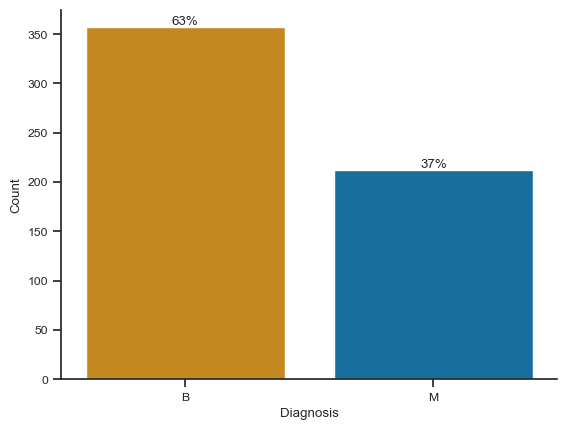

In [39]:
fig, ax = plt.subplots()
sns.countplot(data=df, x='diagnosis', hue='diagnosis', order=['B', 'M'])
heights = df['diagnosis'].value_counts()
for i, height in enumerate(heights):
    ax.text(i, height, f'{height/df.shape[0]:.0%}', ha='center', va='bottom')
sns.despine()
plt.xlabel('Diagnosis')
plt.ylabel('Count')

## 2.4. Numerical features correlation

### 2.4.1. Correlation heatmap

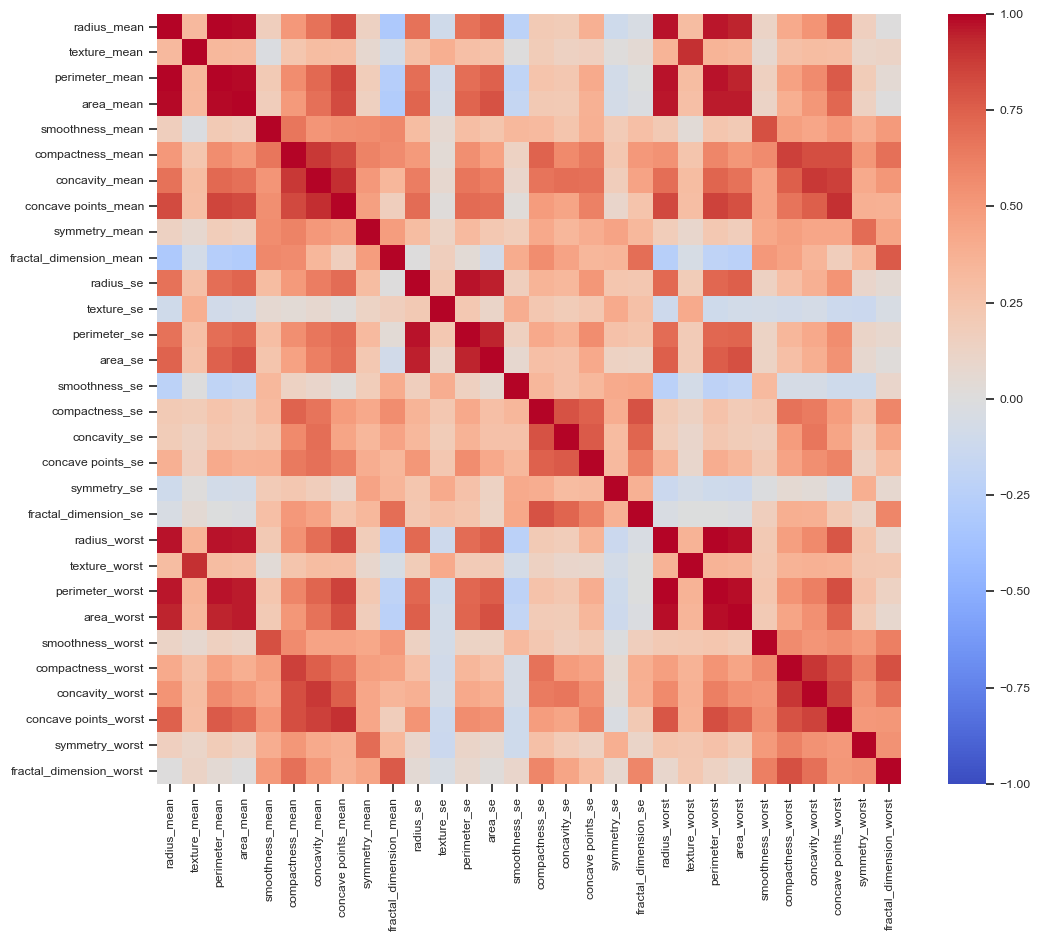

In [40]:
# Pearson's correlation
num_feats = df.select_dtypes('number').columns.to_list()
pearson = df[num_feats].corr(method='pearson')
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(pearson, cmap='coolwarm', vmin=-1, vmax=1);

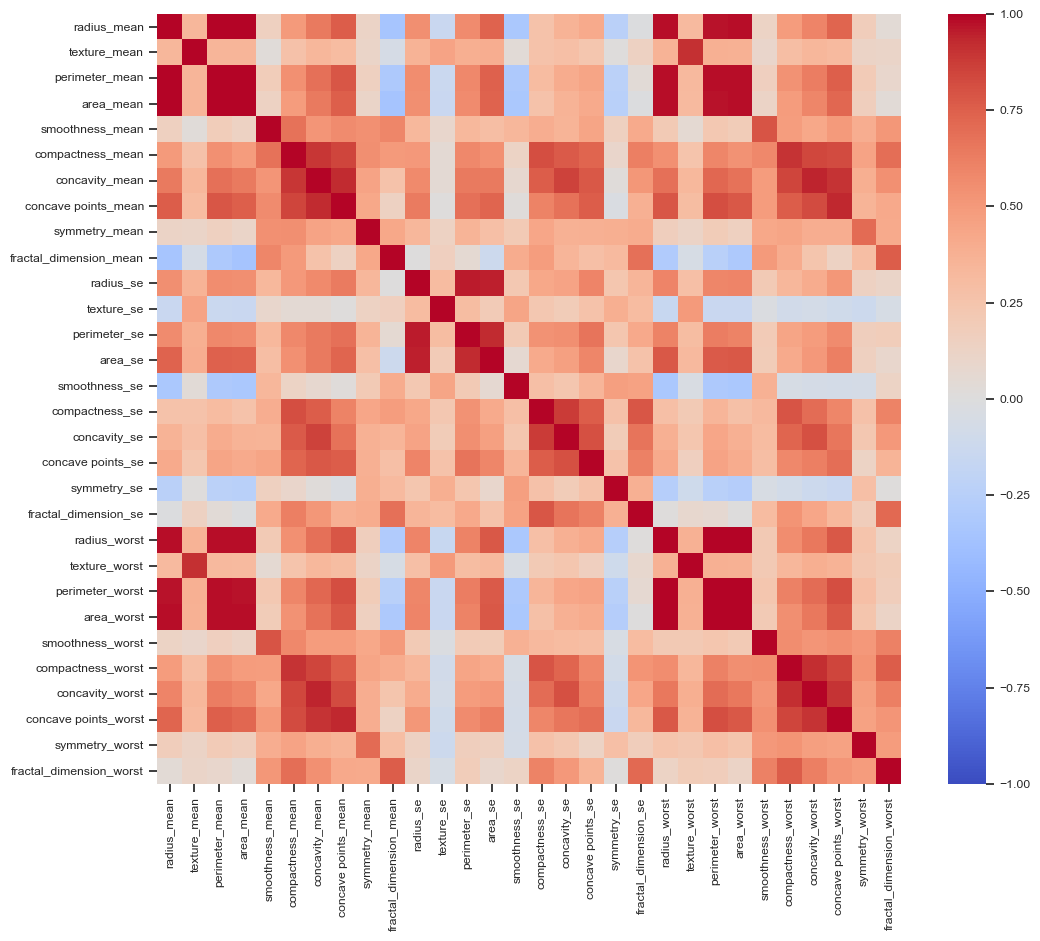

In [41]:
# Spearman's correlation
spearman = df[num_feats].corr(method='spearman')
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(spearman, cmap='coolwarm', vmin=-1, vmax=1);

### 2.4.2. Target vs numerical variables

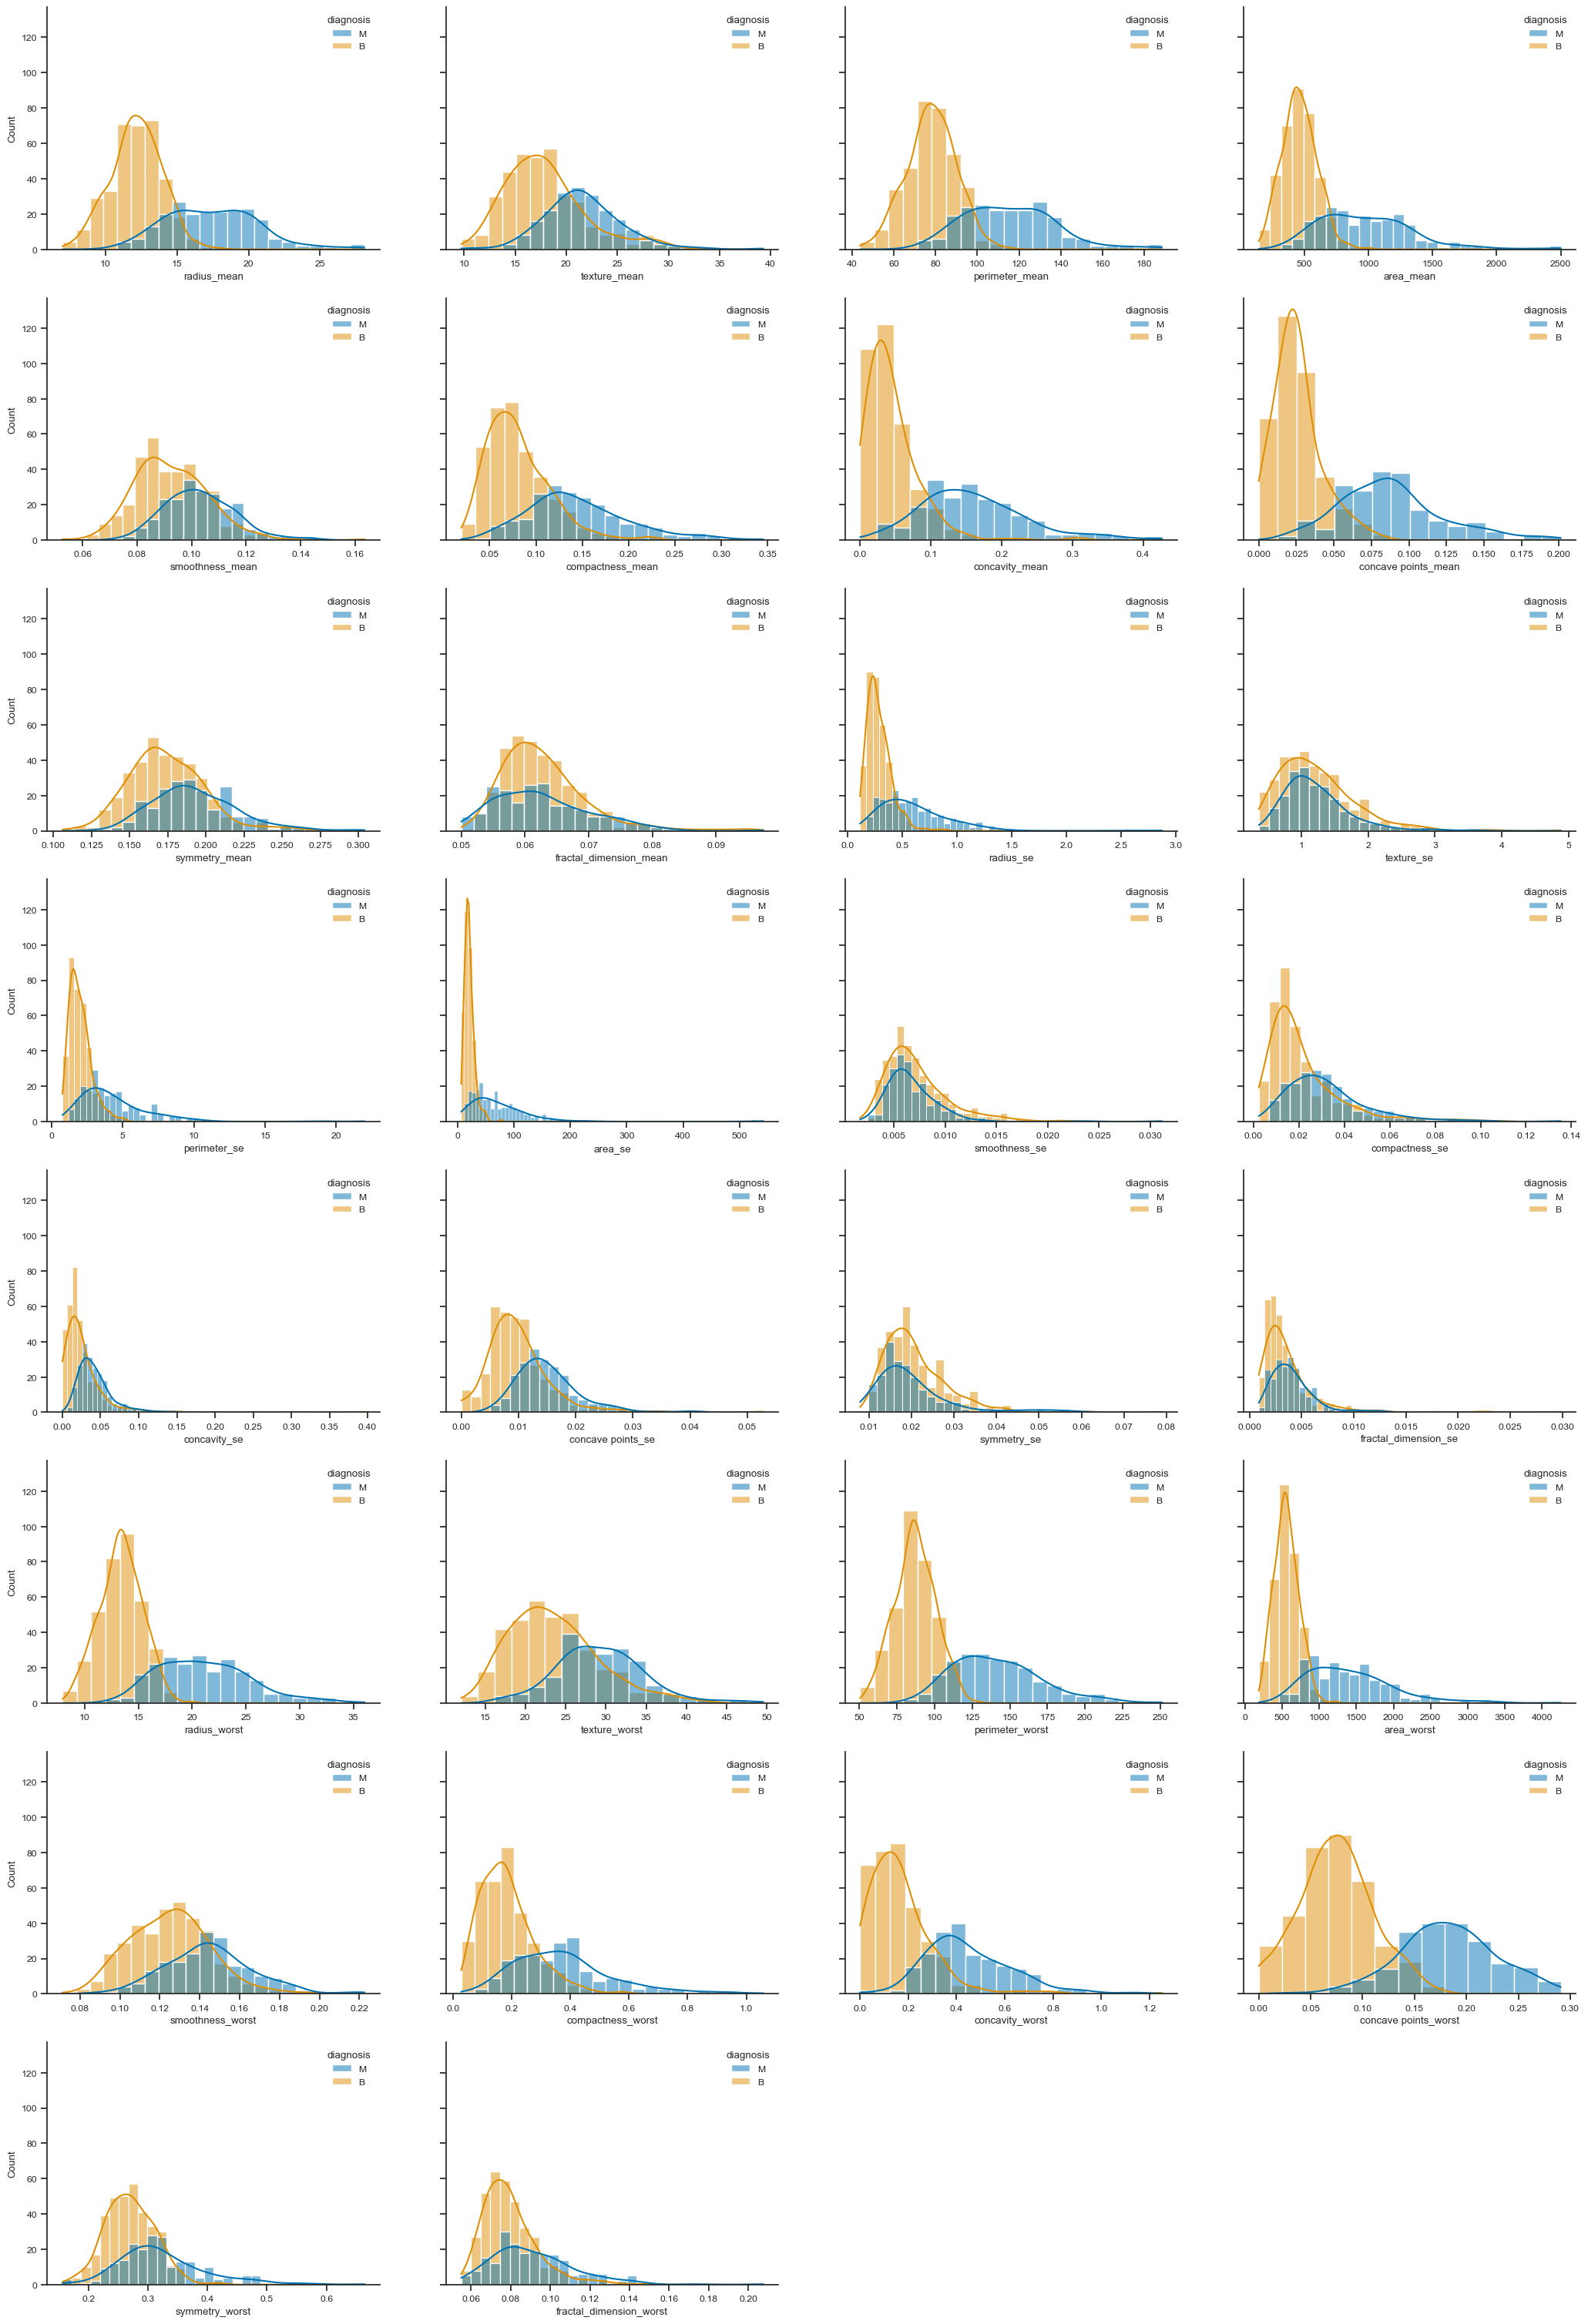

In [53]:
ncols = 4
nrows = int(np.ceil(len(num_feats) / ncols))
fig, axes = plt.subplots(figsize=(6.4*ncols, 4.8*nrows), sharey=True,
                         nrows=nrows, ncols=ncols)
axes = axes.flatten()
for ax, num_feat in zip(axes, num_feats):
    sns.histplot(data=df, x=num_feat, hue='diagnosis', ax=ax, kde=True)
    sns.despine()
for ax in axes[len(num_feats):]:
    ax.set_axis_off()

### 2.4.3. Check for outliers in numerical values

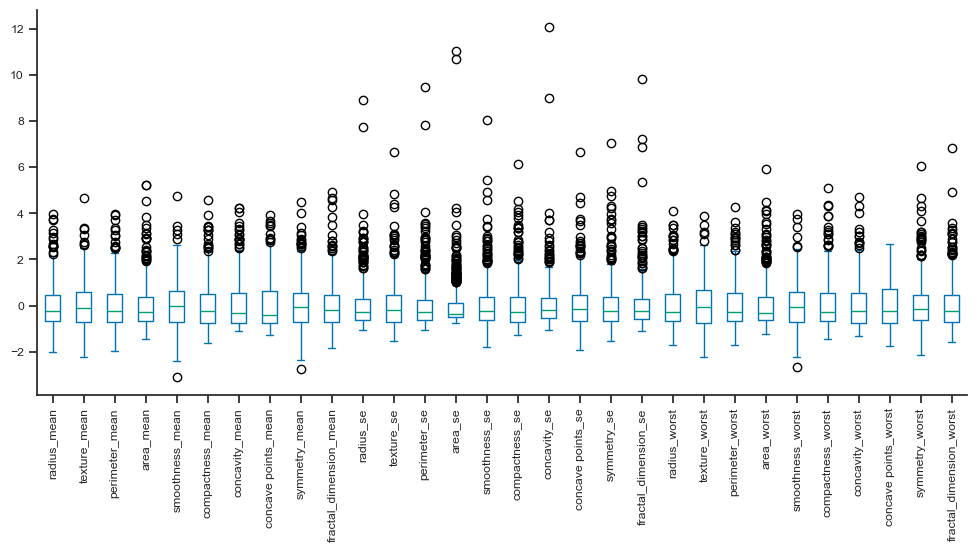

In [82]:
scale = StandardScaler()
fig, ax = plt.subplots(figsize=(12, 5))
scale.fit_transform(df[num_feats]).plot.box(ax=ax)
plt.xticks(rotation=90)
sns.despine();